In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a time series
time = pd.date_range(start='2025-01-01', periods=500, freq='H')

# Simulate vibration and temperature
np.random.seed(42)
vibration = np.random.normal(0.5, 0.05, size=500)  # normal operation
temperature = np.random.normal(70, 2, size=500)

# Add a "fault" event in the last 50 hours
vibration[-50:] += np.linspace(0, 0.5, 50)
temperature[-50:] += np.linspace(0, 10, 50)

# Failure label: 1 = machine about to fail
failure = [0]*450 + [1]*50

# Create DataFrame
df = pd.DataFrame({
    'timestamp': time,
    'vibration': vibration,
    'temperature': temperature,
    'failure': failure
})

df.head()


,timestamp,vibration,temperature,failure
0,2025-01-01 00:00:00,0.524836,71.852355,0
1,2025-01-01 01:00:00,0.493087,73.818833,0
2,2025-01-01 02:00:00,0.532384,67.202865,0
3,2025-01-01 03:00:00,0.576151,71.125938,0
4,2025-01-01 04:00:00,0.488292,68.698715,0


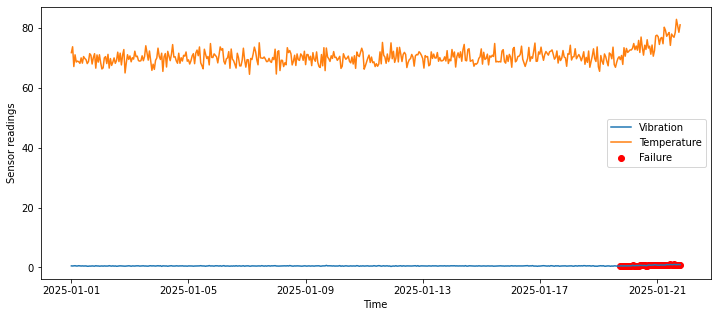

In [2]:
plt.figure(figsize=(12,5))
plt.plot(df['timestamp'], df['vibration'], label='Vibration')
plt.plot(df['timestamp'], df['temperature'], label='Temperature')
plt.scatter(df['timestamp'][df['failure']==1], df['vibration'][df['failure']==1], color='red', label='Failure')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Sensor readings')
plt.show()


In [3]:
from sklearn.model_selection import train_test_split

# Features
X = df[['vibration', 'temperature']]
y = df['failure']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Create model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.93
Confusion Matrix:
 [[82  3]
 [ 4 11]]


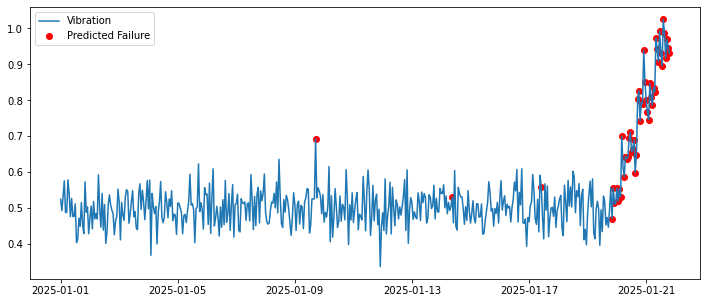

In [5]:
df['predicted_failure'] = model.predict(df[['vibration','temperature']])
plt.figure(figsize=(12,5))
plt.plot(df['timestamp'], df['vibration'], label='Vibration')
plt.scatter(df['timestamp'][df['predicted_failure']==1], df['vibration'][df['predicted_failure']==1], color='red', label='Predicted Failure')
plt.legend()
plt.show()


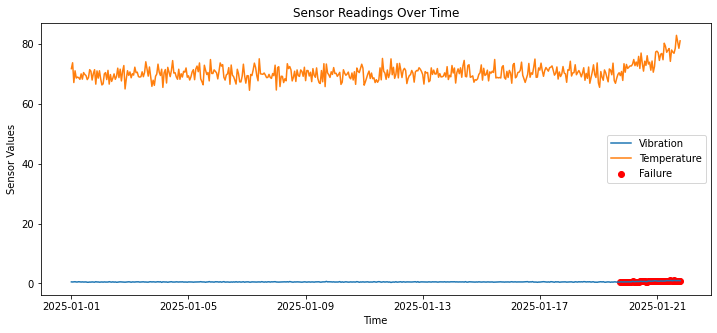

In [6]:
plt.figure(figsize=(12,5))
plt.plot(df['timestamp'], df['vibration'], label='Vibration')
plt.plot(df['timestamp'], df['temperature'], label='Temperature')
plt.scatter(df['timestamp'][df['failure']==1], df['vibration'][df['failure']==1], color='red', label='Failure')
plt.title('Sensor Readings Over Time')
plt.xlabel('Time')
plt.ylabel('Sensor Values')
plt.legend()
plt.show()


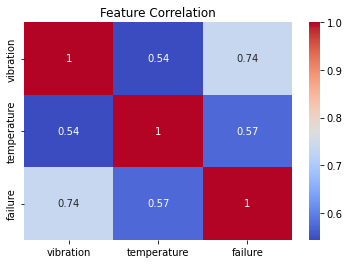

In [7]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(df[['vibration','temperature','failure']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()


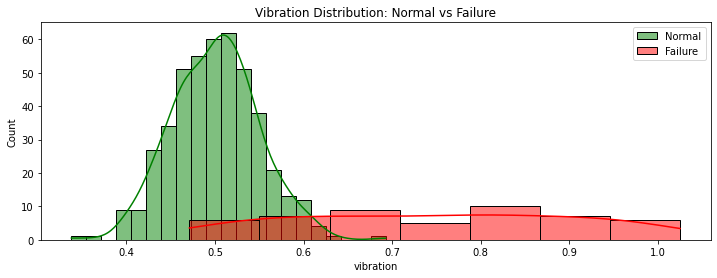

In [8]:
plt.figure(figsize=(12,4))
sns.histplot(df[df['failure']==0]['vibration'], color='green', label='Normal', kde=True)
sns.histplot(df[df['failure']==1]['vibration'], color='red', label='Failure', kde=True)
plt.title('Vibration Distribution: Normal vs Failure')
plt.legend()
plt.show()


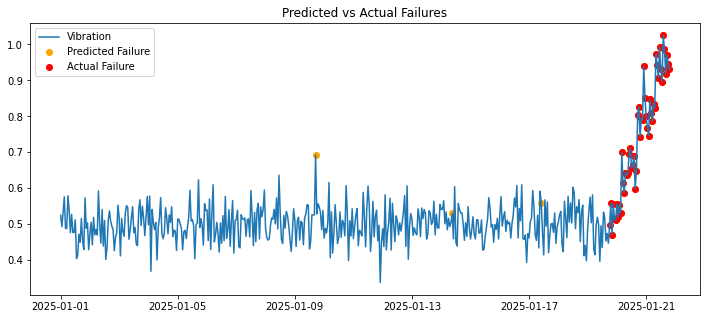

In [9]:
plt.figure(figsize=(12,5))
plt.plot(df['timestamp'], df['vibration'], label='Vibration')
plt.scatter(df['timestamp'][df['predicted_failure']==1], df['vibration'][df['predicted_failure']==1], color='orange', label='Predicted Failure')
plt.scatter(df['timestamp'][df['failure']==1], df['vibration'][df['failure']==1], color='red', label='Actual Failure')
plt.title('Predicted vs Actual Failures')
plt.legend()
plt.show()


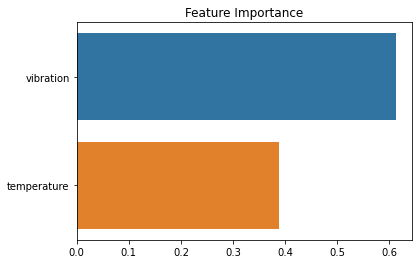

In [10]:
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(6,4))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance')
plt.show()
